In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)
    
from scipy.spatial.distance import euclidean

In [3]:
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.sqrt(np.dot(vector1, vector1)) * np.sqrt(np.dot(vector2, vector2)))

from scipy.spatial.distance import cosine

In [4]:
from scipy.stats.stats import pearsonr

In [5]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [6]:
movies.set_index('movieId', inplace=True)

In [7]:
pd.to_datetime(ratings['timestamp'], unit='s')

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

In [8]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [9]:
user2 = ratings[ratings["userId"].isin([2])]

In [10]:
user2

,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952
237,2,8798,3.5,1445714960
238,2,46970,4.0,1445715013
239,2,48516,4.0,1445715064
240,2,58559,4.5,1445715141
241,2,60756,5.0,1445714980


In [44]:
len(user2)
print('User 2 has seen {} movies'.format(len(user2)))

User 2 has seen 29 movies


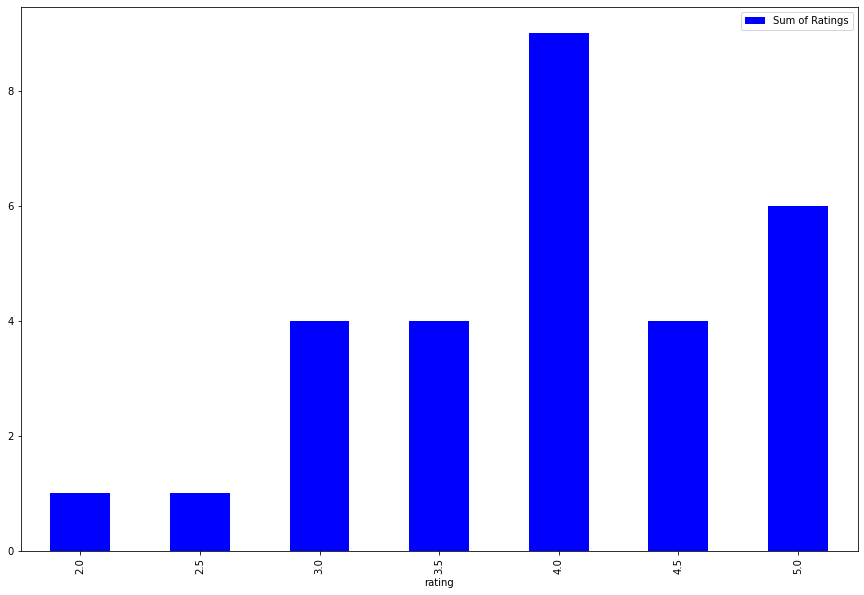

In [12]:
plt.rcParams["figure.figsize"] = (15, 10)
user2.groupby(user2["rating"]).size().plot(kind='bar',color = 'blue').legend(['Sum of Ratings'])

plt.show()

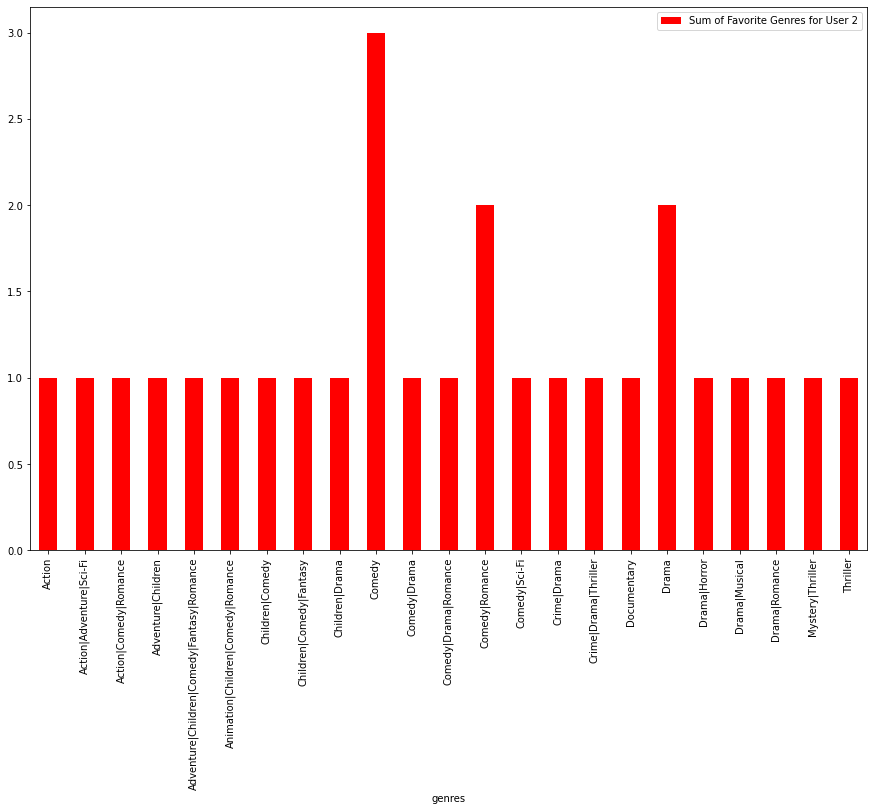

In [45]:
plt.rcParams["figure.figsize"] = (15, 10)
user2.groupby(movies["genres"]).size().plot(kind='bar',color = 'Red').legend(['Sum of Favorite Genres for User 2'])

plt.show()

In [46]:
ratings[(ratings['userId'] == 2) & (ratings['rating'] == 5.0)]

,userId,movieId,rating,timestamp
241,2,60756,5.0,1445714980
248,2,80906,5.0,1445715172
250,2,89774,5.0,1445715189
254,2,106782,5.0,1445714966
259,2,122882,5.0,1445715272
260,2,131724,5.0,1445714851


In [47]:
#wide.loc[2][wide.loc[2] == 5] #can also use this method

In [48]:
movies.loc[60756]

title     Step Brothers (2008)
genres                  Comedy
Name: 60756, dtype: object

In [17]:
movies.loc[80906]

title     Inside Job (2010)
genres          Documentary
Name: 80906, dtype: object

In [18]:
movies.loc[89774]

title     Warrior (2011)
genres             Drama
Name: 89774, dtype: object

In [19]:
movies.loc[106782]

title     Wolf of Wall Street, The (2013)
genres                 Comedy|Crime|Drama
Name: 106782, dtype: object

In [20]:
movies.loc[122882]

title            Mad Max: Fury Road (2015)
genres    Action|Adventure|Sci-Fi|Thriller
Name: 122882, dtype: object

In [21]:
movies.loc[131724]

title     The Jinx: The Life and Deaths of Robert Durst ...
genres                                          Documentary
Name: 131724, dtype: object

In [49]:
wide = ratings.pivot(index='userId', columns='movieId', values='rating')

In [50]:
cor = wide.T.corr()

In [51]:
wide.fillna(-1, inplace=True)

In [52]:
from scipy.spatial.distance import pdist, squareform

In [53]:
euclidean_distances = squareform(pdist(wide, metric=euclidean)) 

In [54]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [55]:
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [56]:
euclidean_df.loc[2].sort_values().loc[442]

29.0

In [57]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [58]:
cosine_df.loc[2].sort_values().loc[442]

0.04202531643895069

In [59]:
rated_5_by_442_not_watched_by_2 = (wide.loc[442] >= 2) & (wide.loc[2] == -1)
print(wide.loc[2][rated_5_by_442_not_watched_by_2])
print(wide.loc[442][rated_5_by_442_not_watched_by_2])

movieId
362    -1.0
524    -1.0
2145   -1.0
2908   -1.0
3752   -1.0
4361   -1.0
Name: 2, dtype: float64
movieId
362     2.5
524     2.0
2145    2.0
2908    2.0
3752    2.0
4361    2.5
Name: 442, dtype: float64


In [60]:
movies.iloc[362]

title     Being Human (1993)
genres                 Drama
Name: 418, dtype: object

In [37]:
movies.iloc[524]

title     Pallbearer, The (1996)
genres                    Comedy
Name: 612, dtype: object

In [39]:
movies.iloc[2145]

title     American Beauty (1999)
genres             Drama|Romance
Name: 2858, dtype: object

In [40]:
movies.iloc[2908]

title       Bait (2000)
genres    Action|Comedy
Name: 3898, dtype: object

In [41]:
movies.iloc[3752]

title     All the Right Moves (1983)
genres                 Drama|Romance
Name: 5226, dtype: object

In [42]:
movies.iloc[4361]

title     Italian Job, The (2003)
genres               Action|Crime
Name: 6378, dtype: object

User 2 has seen 29 movies. His top movies include: Step Brothers, Inside Job, Warrior, Wolf of Wall Street, Mad Max: Fury Road, and The Jinx: The Life and Deaths of Robert Durst. All of these movies were given a rating of 5 by user 2. The most similar person to user 2 is user 442. Using euclidean distance and cosine user 442 has a euclidean value of 29.0 and cosine value of 0.04202531643895069 to user 2. Both of these values confirm that user 2 and 442 have similar tastes in movies. For the recommendation I used two metrics: Movies that user 442 rated highly and movies user 2 has not seen. From these two metrics the movies: Being Human, Pallbearer, American Beauty, Bait, All the Right Moves, and Italian Job are recommended for user 2. I agree with all of these recommendations except for Italian Job because user 2's favorite genres are Comedy, Comedy/Romance, and Drama, and Italian job is an Action/Crime movie. 